# Geospatial Data Analysis with Python

## Introduction to GeoPandas
### Objective:
GeoPandas enhances the capabilities of pandas by enabling spatial data operations that are crucial for a wide range of applications, from urban planning and environmental monitoring to transportation logistics. It allows for efficient analysis and visualization of geospatial data, merging the capabilities of pandas and spatial operations into a single, powerful library.

### Tools Overview:
GeoPandas, coupled with Folium, provides a robust platform for handling, analyzing, and visualizing geospatial data. While GeoPandas excels in manipulating vector data through GeoDataFrames, Folium is excellent for creating interactive maps that enhance the visualization of geographical analyses.

### 1. Handling Spatial Data with GeoPandas
#### Vector Data:
Vector data is essential in describing the earth's surface and includes:
    * Points: Represent specific locations.
    * Lines: Define routes or connections between points.
    * Polygons: Encapsulate areas such as city boundaries or lakes.

#### Raster Data:
Contrastingly, raster data portrays the world as a continuous surface made up of pixels, each representing a value that depicts aspects like elevation or temperature. While GeoPandas primarily handles vector data, it can integrate with libraries like rasterio to manage raster data.

### 2. Reading & Writing Spatial Data
#### Functionality:
GeoPandas offers the read_file() function to import a wide array of vector-based spatial data formats, facilitating easy integration and manipulation within the Python ecosystem.

#### Common Data Formats:
- Shapefile: A prevalent vector data format in the GIS community, consisting of several files:
    - .shp: Stores the geometry.
    - .dbf: Contains attribute data for each shape.
    - .shx: Links attributes to their corresponding shapes. Often distributed as a compressed zip file to manage these multiple 

- components together.
GeoJSON: A modern format for encoding geographic data structures, released in 2016. Its simplicity and efficiency stem from being a single-file format, making it particularly user-friendly for web-based applications.

#### Example - Loading and Examining Data:
To demonstrate GeoPandas' capabilities, let's load a GeoJSON file containing districts of Barcelona from a GitHub repository and display its initial data:

In [34]:
pip install geopandas --user

/etc/zshenv:4: unmatched "

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
import geopandas as gpd
# Define the URL to access the GeoJSON file containing district data for Barcelona.
url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'

# Load the GeoJSON file into a GeoDataFrame named 'districts' using geopandas' read_file function.
# This function directly fetches and parses the GeoJSON data from the provided URL.
districts = gpd.read_file(url)

# Display the first five rows of the 'districts' GeoDataFrame to verify its contents and structure.
districts.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."


Next, to write the data into a file we can use the GeoDataFrame.to_file() function to write the data into a Shapefile by default but you can convert it into GeoJSON using the driver parameter.

In [36]:
# Save the 'districts' GeoDataFrame to a file named 'districts.geojson' using the GeoJSON format.
# This utilizes the 'GeoJSON' driver to ensure the data is correctly formatted for GeoJSON files.
districts.to_file("districts.geojson", driver="GeoJSON")

### 3. GeoDataFrames Properties
#### Overview: 
GeoDataFrames, a subclass of pandas DataFrames, inherit many of their parent class's features but are distinctively enhanced to handle geospatial data. The primary enhancement is the ability to store geometry columns, known as GeoSeries, which allow for a range of spatial operations.

#### Geometry and Active Geometry Column: 
Within a GeoDataFrame, the geometry column is capable of holding various types of vector data such as points, lines, and polygons. Among these, only one column is designated as the active geometry, serving as the foundation for all spatial operations conducted within the GeoDataFrame.

#### Coordinate Reference System (CRS): 
A pivotal feature of GeoDataFrames is the incorporation of CRS information for each column, which specifies the geographic coordinates system used to define the spatial locations of the geometries. This attribute is crucial for spatial analysis; mismatched CRSs between different spatial datasets can lead to inaccurate results when they are combined. The CRS details are accessible through the crs attribute in GeoPandas, ensuring data consistency across different geospatial analyses.

#### Importance of CRS Alignment: 
Ensuring that spatial datasets share a uniform CRS is fundamental in geospatial analysis, as discrepancies in CRS can lead to significant errors in location-based results. GeoPandas stores and manages this information efficiently, making it easier to handle transformations and operations across different datasets.

In [37]:
# Retrieve and display the Coordinate Reference System (CRS) information of the 'districts' GeoDataFrame.
# This CRS describes how the geometric data in 'districts' relates to positions on the Earth.
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 4. Exploring GeoDataFrames

GeoPandas has four useful methods and attributes that can be used to explore the data. We will explore these four methods:

* Area
* Centroid
* Boundary
* Distance

#### 4.1 Area
##### Understanding Area Calculation in GeoDataFrames:
The 'area' attribute of a GeoDataFrame is essential for quantifying the space that a geometry occupies on Earth, typically measured in square meters or square kilometers. This calculation becomes particularly vital in urban planning, agriculture, or environmental science, where understanding the extent of land use is crucial. For accurate area measurements, it is important to use a projected coordinate reference system (CRS) that minimizes area distortion, such as EPSG:3857 (Web Mercator).
##### Example of Area Calculation:
By projecting the GeoDataFrame to an appropriate CRS and utilizing the area attribute, users can easily compute and inspect the areas of various geometries like districts or land plots. This function simplifies comparative analysis of geographic regions in terms of their size.

In [38]:
import geopandas as gpd

# Load your data - assuming it's already loaded in 'districts'
# Convert CRS to a projected system, example using a common world projection EPSG:3857 (Web Mercator)
districts_projected = districts.to_crs(epsg=3857)

# Now calculate the area in square meters
districts_projected['area_m2'] = districts_projected.area
# Display the area results to verify
print(districts_projected['area_m2'])


0    7.480407e+06
1    1.328289e+07
2    4.066298e+07
3    1.069462e+07
4    3.546230e+07
5    7.521454e+06
6    2.123551e+07
7    1.436070e+07
8    1.174714e+07
9    1.858162e+07
Name: area_m2, dtype: float64


#### 4.2 Centroid
##### Exploring Geometric Centroids:
The centroid method computes the geometric center of a polygon, which is the average position of all the points of the figure. In the context of geographic data, centroids are useful for simplifying complex shapes into more manageable points and for performing various spatial analyses, such as clustering or calculating distances between regions.

##### Practical Application of Centroids:
In urban planning or demographics, centroids help represent the central point of areas like electoral districts or service regions, aiding in various logistical optimizations and spatial decision-making processes.

In [39]:
# Calculate the boundary of each geometry
districts['boundary'] = districts.geometry.boundary

# Display the first few boundaries to verify
print(districts['boundary'].head())


0    LINESTRING (2.18345 41.39061, 2.18459 41.38976...
1    LINESTRING (2.1869 41.40165, 2.18689 41.40087,...
2    MULTILINESTRING ((2.14824 41.37623, 2.14896 41...
3    LINESTRING (2.10342 41.4011, 2.10352 41.40109,...
4    MULTILINESTRING ((2.07313 41.43522, 2.07319 41...
Name: boundary, dtype: geometry


* Verify the CRS Transformation
    * Ensure that the transformation was successful:

In [40]:
# Print the CRS to confirm
print(districts_projected.crs)

EPSG:3857


#### 4.3 Boundary
##### Calculating Geometric Boundaries:
The boundary method returns a representation of the outer edge of each geometry in a GeoDataFrame, usually as a LineString or MultiLineString. This is particularly useful in defining the limits of geographic features without the interior complexity, allowing for clearer visualizations and boundary-focused analyses.

##### Visualization and Analysis of Boundaries:
Plotting these boundaries can provide valuable insights into geographical separations and adjacencies, which is beneficial for tasks such as border patrols, resource management, and infrastructural development.

In [41]:
import geopandas as gpd

# Assuming your GeoDataFrame 'districts' is already loaded
# Calculate the boundary of each geometry
districts['boundary'] = districts.geometry.boundary

# Print the 'boundary' column to verify
print(districts[['boundary']])

                                            boundary
0  LINESTRING (2.18345 41.39061, 2.18459 41.38976...
1  LINESTRING (2.1869 41.40165, 2.18689 41.40087,...
2  MULTILINESTRING ((2.14824 41.37623, 2.14896 41...
3  LINESTRING (2.10342 41.4011, 2.10352 41.40109,...
4  MULTILINESTRING ((2.07313 41.43522, 2.07319 41...
5  LINESTRING (2.13629 41.42363, 2.1364 41.42358,...
6  LINESTRING (2.15949 41.44977, 2.15942 41.4496,...
7  LINESTRING (2.18706 41.46772, 2.18711 41.46711...
8  LINESTRING (2.18764 41.46212, 2.18765 41.46208...
9  LINESTRING (2.20736 41.42711, 2.20698 41.42665...


In [42]:
pip install pillow

/etc/zshenv:4: unmatched "

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install matplotlib

/etc/zshenv:4: unmatched "

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install pillow numpy

/etc/zshenv:4: unmatched "

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


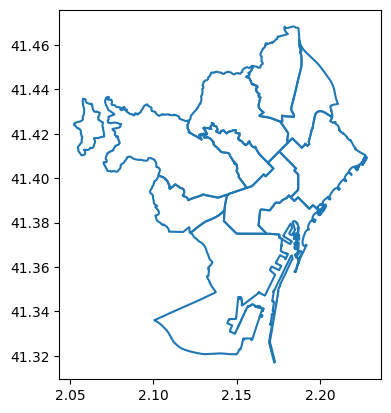

In [45]:
import matplotlib.pyplot as plt

# Plot the boundaries for visual inspection
districts['boundary'].plot()
plt.show()

#### 4.4 Distance
##### Overview
The distance method is used to calculate the shortest distance from a specific geometry to a designated point. As an example, we will determine the distance from the Sagrada Familia church to the centroids of each district in Barcelona and subsequently store these distances in kilometers in a new column within our GeoDataFrame.

##### Step 1: Define Sagrada Familia's Geometry
First, create a Point geometry for Sagrada Familia. It's essential to input the longitude and latitude in their correct order. Also, ensure that the point is established in the appropriate geographic CRS, which is typically EPSG:4326 for global reference.

In [46]:
from shapely.geometry import Point
import geopandas as gpd

# Create Point object for Sagrada Familia with longitude and latitude
sagrada_fam = Point(2.17436080058505, 41.40356946781304)  # Long, Lat


##### Step 2: Standardize CRS Across Geometries
To ensure accuracy in distance calculations, convert both the Point representing Sagrada Familia and the GeoDataFrame containing district centroids to the same projected CRS. A local CRS that minimizes distance distortion, such as EPSG:25831 (ETRS89 / UTM zone 31N), is recommended for Barcelona. This standardization is crucial for precise spatial analysis.

In [47]:
# Set CRS for Sagrada Familia point to match the geographic CRS of districts
sagrada_fam = gpd.GeoSeries([sagrada_fam], crs=4326)

# Convert both geometries to a local projected CRS for Barcelona
sagrada_fam = sagrada_fam.to_crs(epsg=25831)
districts = districts.to_crs(epsg=25831)

# Calculate centroids for districts in the same CRS
districts['centroid'] = districts.geometry.centroid

##### Step 3: Compute Distances
Finally, calculate the distance from the Sagrada Familia to each district’s centroid using the distance method. This computation will yield distances in meters, providing a precise measurement of how far each district is from this landmark.

Implementation Example
<br>Here is how you might implement these steps in code:

In [48]:
# Calculate distance from Sagrada Familia to each centroid
districts['sagrada_fam_dist'] = districts['centroid'].apply(lambda x: sagrada_fam.distance(x)[0])

# Convert distance from meters to kilometers for easier interpretation
districts['sagrada_fam_dist_km'] = districts['sagrada_fam_dist'] / 1000

# Display the distances
print(districts[['sagrada_fam_dist_km']])

   sagrada_fam_dist_km
0             2.547315
1             1.565914
2             6.473589
3             5.042581
4             5.758629
5             1.993844
6             3.467748
7             4.745292
8             3.835413
9             2.274990


### 5. Plotting Data with GeoPandas
#### Overview
Visualizing geospatial data is a fundamental step in understanding the underlying patterns and distributions within your data. GeoPandas simplifies this process significantly, leveraging the familiar plotting capabilities of Pandas alongside the powerful features of Matplotlib.

#### Basic Plotting with GeoPandas
GeoPandas makes plotting straightforward through the GeoDataFrame.plot() function, which is seamlessly integrated with the Matplotlib library. This integration allows for quick and effective visual representations of geospatial data.

#### Example: Visualizing Barcelona's Districts
To begin, let's visualize the districts of Barcelona with a simple plot:

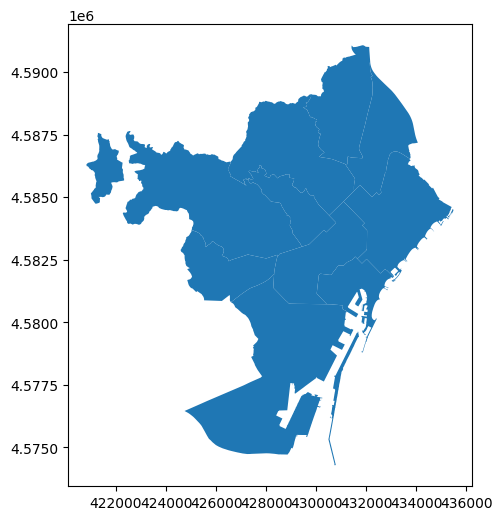

In [49]:
# Plot the 'districts' GeoDataFrame on a matplotlib axis with a specified figure size of 10 inches by 6 inches.
ax = districts.plot(figsize=(10,6))

#### Enhancing the Plot with Color Differentiation
While the initial plot provides a basic outline, it can be made more informative by applying a unique color to each district, enhancing the visual differentiation:

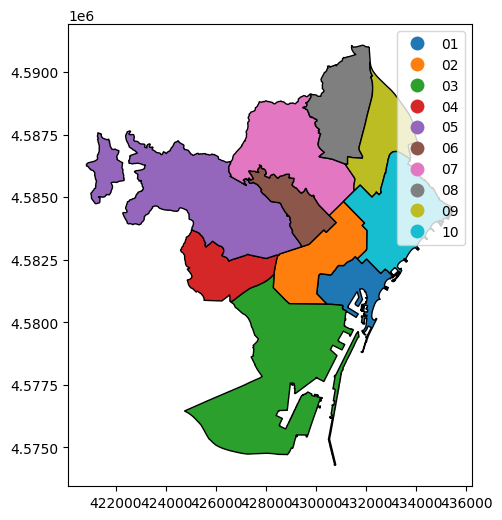

In [50]:
# Plot the 'districts' GeoDataFrame, coloring the districts based on the 'DISTRICTE' column values.
# Set the figure size to 10 inches by 6 inches for better visibility.
# Use black for the edges of each district to enhance visual distinction.
# Include a legend to describe the color mapping of the 'DISTRICTE' values.
ax = districts.plot(column='DISTRICTE', figsize=(10,6), edgecolor='black', legend=True)

#### Adding Centroids for More Detail
For further detail, we can overlay the centroids of each district on the map, providing a focal point for each area:

In [22]:
pip install contextily

/etc/zshenv:4: unmatched "
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 8.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pyproj rasterio geopandas

/etc/zshenv:4: unmatched "

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


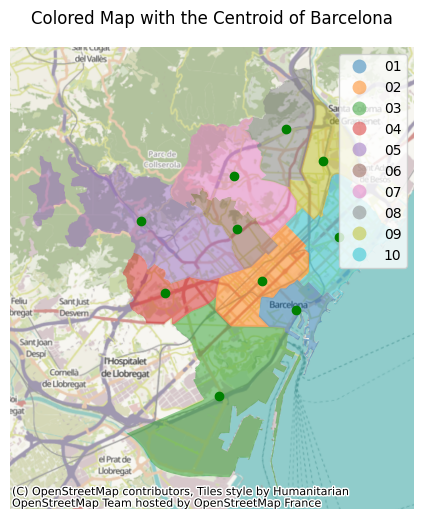

In [51]:
import contextily
import matplotlib.pyplot as plt

# Plot the districts with color and centroids
ax = districts.plot(column='DISTRICTE', figsize=(12, 6), alpha=0.5, legend=True)
districts["centroid"].plot(ax=ax, color="green")

# Add basemap using contextily
contextily.add_basemap(ax, crs=districts.crs.to_string())

plt.title('Colored Map with the Centroid of Barcelona')
plt.axis('off')
plt.show()


#### Summary
These steps demonstrate how GeoPandas can be employed to not only plot basic geospatial data but also enhance visualizations with color schemes and additional geometric markers such as centroids. This approach is not only easy and straightforward but also incredibly powerful for conducting comprehensive geospatial analyses and presentations.

## Folium: Interactive Map Visualization
### Introduction to Folium
Folium is a versatile Python library designed to create interactive maps that leverage the capabilities of the Leaflet JavaScript library. It is particularly effective for adding markers, pop-ups, choropleths, and various other layers to your maps, making it a prime choice for dynamic geospatial data representation. The integration with HTML allows for easy sharing and accessibility of these interactive maps.

### Integration and Compatibility
Folium seamlessly integrates with other Python geospatial libraries such as GeoPandas and Cartopy, enhancing its utility in handling complex geospatial datasets. Its use of Map Tiles enables the management of large datasets, which is crucial for detailed mapping applications. Despite its ease of use and aesthetic appeal, Folium may encounter limitations when tackling more advanced geospatial analyses and manipulations.

### Practical Applications
Folium is particularly useful in domains like supply chain management and logistics, where visualizing distribution networks, optimizing routes, and monitoring real-time locations of shipments are vital. Its interactive features allow for an engaging presentation of data that can inform decision-making processes effectively.

### Installing Folium
To start creating interactive maps with Folium, you first need to install the library. This can be done via pip:

In [23]:
pip install folium

/etc/zshenv:4: unmatched "

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Creating Maps with Folium and Leaflet
#### Generating Interactive Maps
Creating a map with Folium starts with defining the initial location and zoom level. Here’s how to quickly get started:
#### Get Lat Long from Address:
https://www.latlong.net/convert-address-to-lat-long.html

In [52]:
import folium

# Define the initial location and zoom level
map = folium.Map(location=[49.263570, -123.138570], zoom_start=15)

# Display the map
map

### Adding Markers and Pop-ups
To add more interactivity, markers and pop-ups can be placed on the map to provide additional information:

In [53]:
# Adding a marker with a simple pop-up
folium.Marker(
    [49.283570, -123.115020], 
    popup="<strong>BCIT Downtown Campus</strong>", 
    tooltip="Click for mre information"
).add_to(map)

# Show the updated map
map

In [40]:
import folium

# Create a map centered around the specific location
m = folium.Map(location=[49.253349, -123.004204], zoom_start=15)

# Add a marker to the map with a custom icon and tooltip
marker = folium.Marker(
    location=[49.253349, -123.004204],
    popup="<strong>BCIT Burnaby Campus</strong>",
    icon=folium.Icon(icon='envelope', color='red'),
    tooltip="Click for more information"
)

# Add the marker to the map
marker.add_to(m)

# Display the map
m

### Distance Between Two Campus:

In [26]:
pip install geopy

/etc/zshenv:4: unmatched "

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [54]:
from geopy.distance import geodesic

# Correct coordinates of campus 1 (latitude, longitude)
campus1_coords = (49.283569, -123.115021)  # Example corrected values

# Correct coordinates of campus 2 (latitude, longitude)
campus2_coords = (49.248569, -123.001021)  # Example corrected values

# Calculate the distance between the two campuses
distance_km = geodesic(campus1_coords, campus2_coords).kilometers  # Distance in kilometers
distance_miles = geodesic(campus1_coords, campus2_coords).miles  # Distance in miles

print(f"The distance between the two campuses is approximately {distance_km:.2f} kilometers.")
print(f"The distance between the two campuses is approximately {distance_miles:.2f} miles.")

The distance between the two campuses is approximately 9.16 kilometers.
The distance between the two campuses is approximately 5.69 miles.


Folium offers a straightforward and visually appealing way to create interactive maps for various applications, enhancing the accessibility and interpretation of spatial data. Whether for professional presentations, academic projects, or personal use, Folium empowers users to build rich, interactive geospatial visualizations.